In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v27
from Resources.Game import *


In [3]:
model = Model_v27()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v27_2')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27_2/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 1500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [6]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
# validation_error_list = torch.load('validation_errors_v27_2')
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.5860310792922974
validation error for model_batch 20: 0.4764137864112854
validation error for model_batch 30: 0.5484185218811035
validation error for model_batch 40: 0.4747105836868286
validation error for model_batch 50: 0.4630415439605713
validation error for model_batch 60: 0.38609233498573303
validation error for model_batch 70: 0.45483294129371643
validation error for model_batch 80: 0.4442121386528015
validation error for model_batch 90: 0.384964257478714
validation error for model_batch 100: 0.4490567743778229


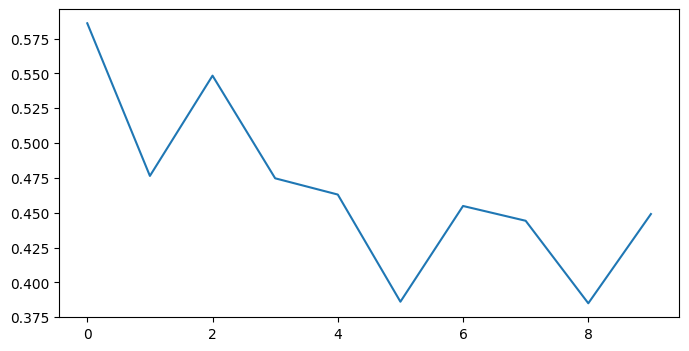

validation error for model_batch 110: 0.4221200942993164
validation error for model_batch 120: 0.38297417759895325
validation error for model_batch 130: 0.4095767140388489
validation error for model_batch 140: 0.37960705161094666
validation error for model_batch 150: 0.40974628925323486
validation error for model_batch 160: 0.3676152527332306
validation error for model_batch 170: 0.3749568462371826
validation error for model_batch 180: 0.38795846700668335
validation error for model_batch 190: 0.36541008949279785
validation error for model_batch 200: 0.3905588984489441


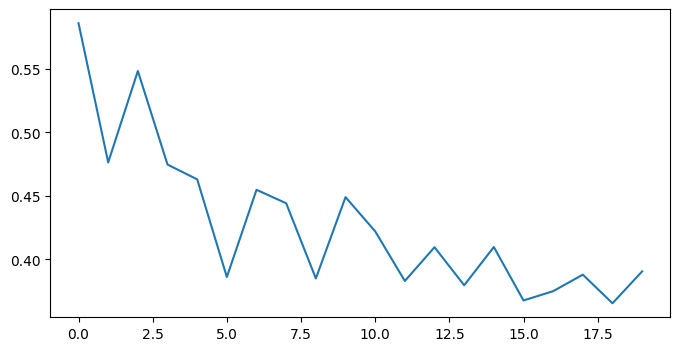

validation error for model_batch 210: 0.36258530616760254
validation error for model_batch 220: 0.3945517838001251
validation error for model_batch 230: 0.3774711787700653
validation error for model_batch 240: 0.3693433403968811
validation error for model_batch 250: 0.3378710448741913
validation error for model_batch 260: 0.3627888262271881
validation error for model_batch 270: 0.35430434346199036
validation error for model_batch 280: 0.40105703473091125
validation error for model_batch 290: 0.37617525458335876
validation error for model_batch 300: 0.37967950105667114


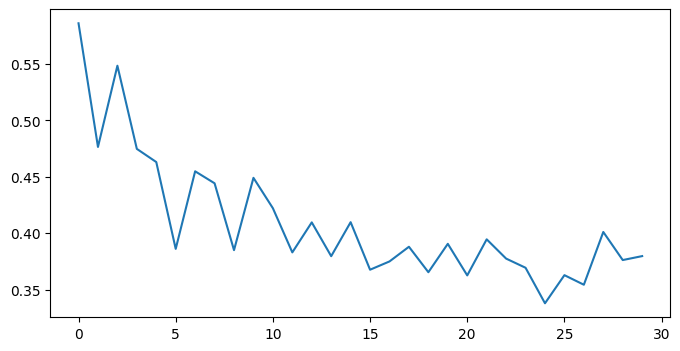

validation error for model_batch 310: 0.3726872503757477
validation error for model_batch 320: 0.36845964193344116
validation error for model_batch 330: 0.37859195470809937
validation error for model_batch 340: 0.3301866054534912
validation error for model_batch 350: 0.35343942046165466
validation error for model_batch 360: 0.3456205129623413
validation error for model_batch 370: 0.3795863389968872
validation error for model_batch 380: 0.3821861743927002
validation error for model_batch 390: 0.38563647866249084
validation error for model_batch 400: 0.35401803255081177


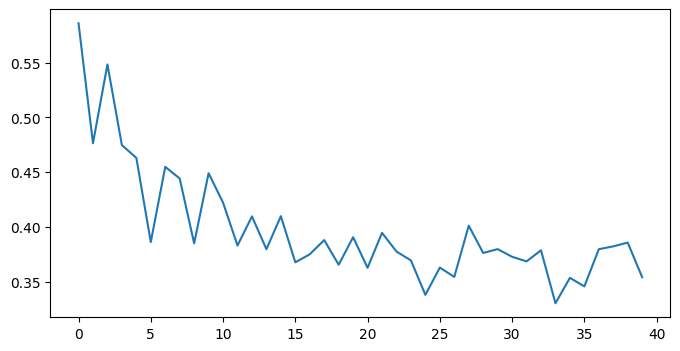

validation error for model_batch 410: 0.3314393162727356
validation error for model_batch 420: 0.37883785367012024
validation error for model_batch 430: 0.3668394386768341
validation error for model_batch 440: 0.3827383518218994
validation error for model_batch 450: 0.3589526116847992
validation error for model_batch 460: 0.3313988149166107
validation error for model_batch 470: 0.3662344217300415
validation error for model_batch 480: 0.35898593068122864
validation error for model_batch 490: 0.3149043619632721
validation error for model_batch 500: 0.3640882670879364


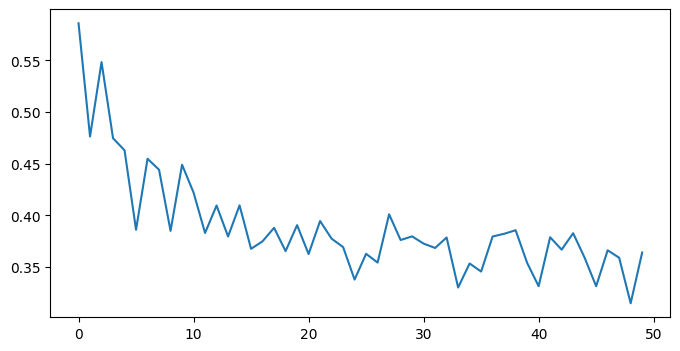

validation error for model_batch 510: 0.40256771445274353
validation error for model_batch 520: 0.34002748131752014
validation error for model_batch 530: 0.381606787443161
validation error for model_batch 540: 0.32316315174102783
validation error for model_batch 550: 0.3326753079891205
validation error for model_batch 560: 0.3774586021900177
validation error for model_batch 570: 0.31867486238479614
validation error for model_batch 580: 0.3537530303001404
validation error for model_batch 590: 0.31596285104751587
validation error for model_batch 600: 0.34917116165161133


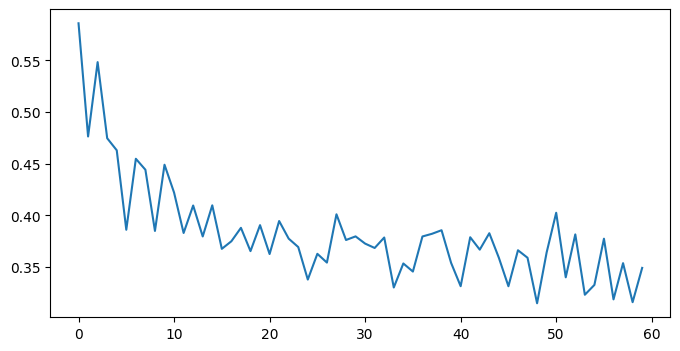

validation error for model_batch 610: 0.3553922772407532
validation error for model_batch 620: 0.32855015993118286
validation error for model_batch 630: 0.3236694633960724
validation error for model_batch 640: 0.31300216913223267
validation error for model_batch 650: 0.30702733993530273
validation error for model_batch 660: 0.3667401373386383
validation error for model_batch 670: 0.2831368148326874
validation error for model_batch 680: 0.3377009332180023
validation error for model_batch 690: 0.3316850960254669
validation error for model_batch 700: 0.3407239317893982


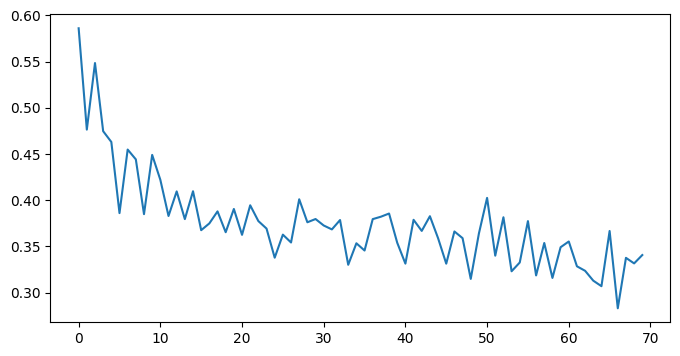

validation error for model_batch 710: 0.3344607949256897
validation error for model_batch 720: 0.32150691747665405
validation error for model_batch 730: 0.3441983461380005
validation error for model_batch 740: 0.32319286465644836
validation error for model_batch 750: 0.32721996307373047
validation error for model_batch 760: 0.3295343518257141
validation error for model_batch 770: 0.33592042326927185
validation error for model_batch 780: 0.332873672246933
validation error for model_batch 790: 0.36434751749038696
validation error for model_batch 800: 0.32290351390838623


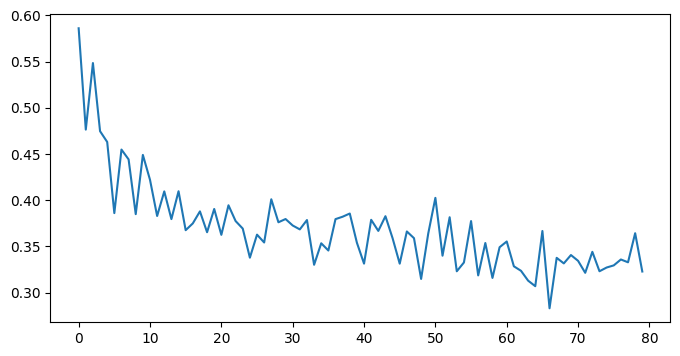

validation error for model_batch 810: 0.3281066417694092
validation error for model_batch 820: 0.3077473044395447
validation error for model_batch 830: 0.33499565720558167
validation error for model_batch 840: 0.3288757801055908
validation error for model_batch 850: 0.33038780093193054
validation error for model_batch 860: 0.32733777165412903
validation error for model_batch 870: 0.31073370575904846
validation error for model_batch 880: 0.31643396615982056
validation error for model_batch 890: 0.332226037979126
validation error for model_batch 900: 0.33025655150413513


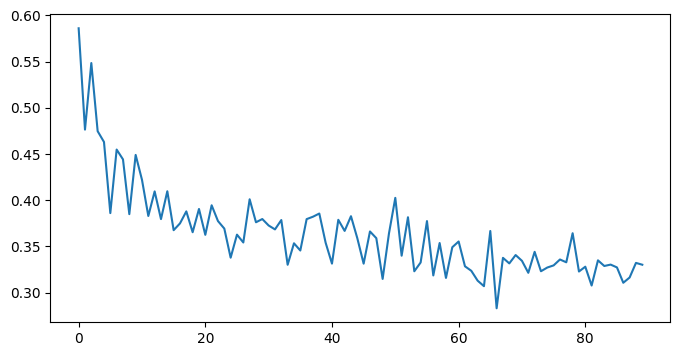

validation error for model_batch 910: 0.3283582925796509
validation error for model_batch 920: 0.3073316514492035
validation error for model_batch 930: 0.31015604734420776
validation error for model_batch 940: 0.3211158514022827
validation error for model_batch 950: 0.30860382318496704
validation error for model_batch 960: 0.31759020686149597
validation error for model_batch 970: 0.3152564764022827
validation error for model_batch 980: 0.34302881360054016
validation error for model_batch 990: 0.30546271800994873
validation error for model_batch 1000: 0.3176639974117279


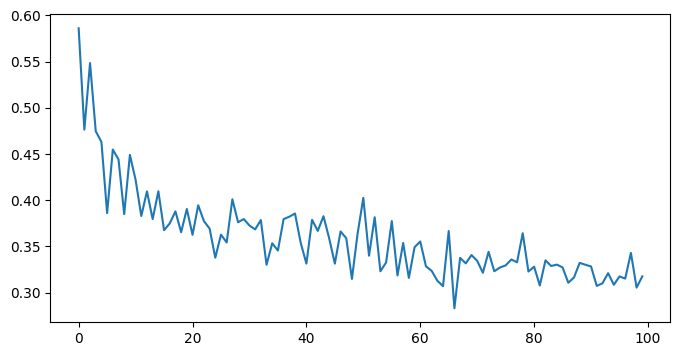

validation error for model_batch 1010: 0.2869986891746521
validation error for model_batch 1020: 0.29737281799316406
validation error for model_batch 1030: 0.31922125816345215
validation error for model_batch 1040: 0.31345412135124207
validation error for model_batch 1050: 0.3194817006587982
validation error for model_batch 1060: 0.324881374835968
validation error for model_batch 1070: 0.2974833846092224
validation error for model_batch 1080: 0.31300386786460876
validation error for model_batch 1090: 0.30831268429756165
validation error for model_batch 1100: 0.32543742656707764


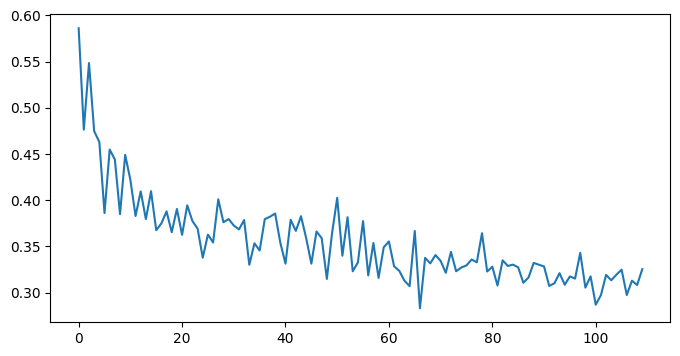

validation error for model_batch 1110: 0.3058982193470001
validation error for model_batch 1120: 0.3218531310558319
validation error for model_batch 1130: 0.3076944053173065
validation error for model_batch 1140: 0.3144521117210388
validation error for model_batch 1150: 0.31226328015327454
validation error for model_batch 1160: 0.3271259069442749
validation error for model_batch 1170: 0.32615163922309875
validation error for model_batch 1180: 0.30719995498657227
validation error for model_batch 1190: 0.32573339343070984
validation error for model_batch 1200: 0.3102670907974243


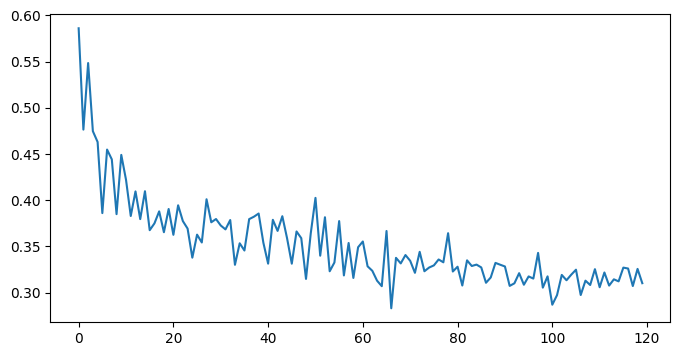

validation error for model_batch 1210: 0.3029986321926117
validation error for model_batch 1220: 0.30852794647216797
validation error for model_batch 1230: 0.31315702199935913
validation error for model_batch 1240: 0.32760876417160034
validation error for model_batch 1250: 0.3249533176422119
validation error for model_batch 1260: 0.3208613395690918
validation error for model_batch 1270: 0.31269824504852295
validation error for model_batch 1280: 0.3243281841278076
validation error for model_batch 1290: 0.31075385212898254
validation error for model_batch 1300: 0.32187238335609436


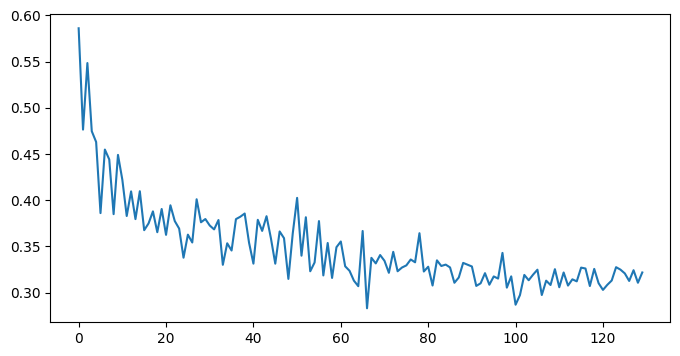

validation error for model_batch 1310: 0.3185410499572754
validation error for model_batch 1320: 0.31541499495506287
validation error for model_batch 1330: 0.3153335154056549
validation error for model_batch 1340: 0.2926340401172638
validation error for model_batch 1350: 0.2976487874984741
validation error for model_batch 1360: 0.30580979585647583
validation error for model_batch 1370: 0.3317318260669708
validation error for model_batch 1380: 0.32019197940826416
validation error for model_batch 1390: 0.3191700875759125
validation error for model_batch 1400: 0.28657543659210205


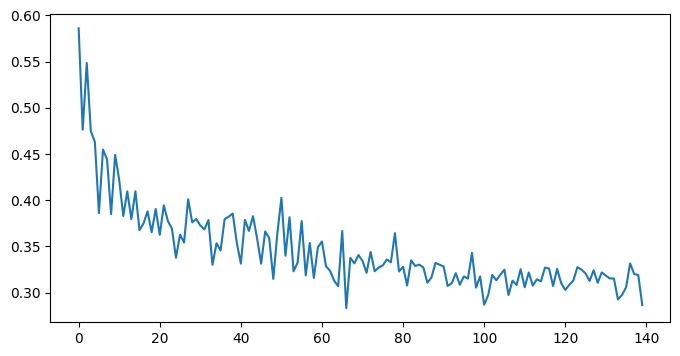

validation error for model_batch 1410: 0.30042871832847595
validation error for model_batch 1420: 0.3002111315727234
validation error for model_batch 1430: 0.30383437871932983
validation error for model_batch 1440: 0.29912394285202026
validation error for model_batch 1450: 0.29370665550231934
validation error for model_batch 1460: 0.309150367975235
validation error for model_batch 1470: 0.3139244019985199
validation error for model_batch 1480: 0.3012694716453552
validation error for model_batch 1490: 0.32799986004829407
validation error for model_batch 1500: 0.3172416388988495


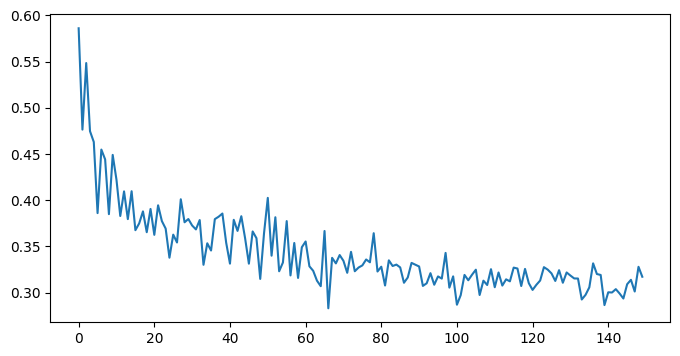

validation error for model_batch 1510: 0.30456477403640747
validation error for model_batch 1520: 0.3164704740047455
validation error for model_batch 1530: 0.311608225107193
validation error for model_batch 1540: 0.321391224861145
validation error for model_batch 1550: 0.2919307351112366
validation error for model_batch 1560: 0.3217746317386627
validation error for model_batch 1570: 0.32289519906044006
validation error for model_batch 1580: 0.29574358463287354
validation error for model_batch 1590: 0.30299699306488037
validation error for model_batch 1600: 0.2958473265171051


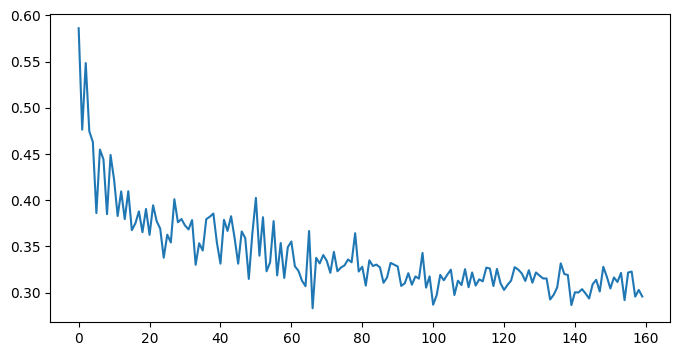

validation error for model_batch 1610: 0.299894243478775
validation error for model_batch 1620: 0.301440566778183
validation error for model_batch 1630: 0.3035643696784973
validation error for model_batch 1640: 0.279421865940094
validation error for model_batch 1650: 0.32501220703125
validation error for model_batch 1660: 0.2998970150947571
validation error for model_batch 1670: 0.30410340428352356
validation error for model_batch 1680: 0.3193986415863037
validation error for model_batch 1690: 0.3037426173686981
validation error for model_batch 1700: 0.2934363782405853


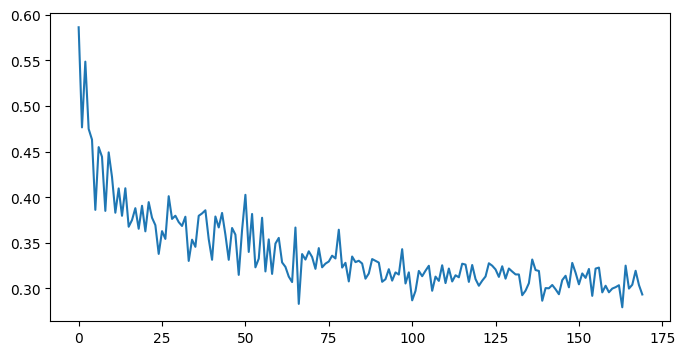

validation error for model_batch 1710: 0.3087884485721588
validation error for model_batch 1720: 0.29836800694465637
validation error for model_batch 1730: 0.28823328018188477
validation error for model_batch 1740: 0.31722205877304077
validation error for model_batch 1750: 0.30548450350761414
validation error for model_batch 1760: 0.2996256649494171
validation error for model_batch 1770: 0.3030109703540802
validation error for model_batch 1780: 0.29566454887390137
validation error for model_batch 1790: 0.29440203309059143
validation error for model_batch 1800: 0.31572428345680237


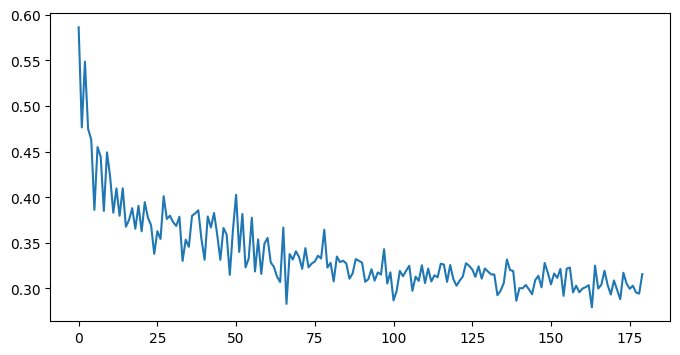

validation error for model_batch 1810: 0.29805684089660645
validation error for model_batch 1820: 0.3048221468925476
validation error for model_batch 1830: 0.3080507218837738
validation error for model_batch 1840: 0.3028344213962555
validation error for model_batch 1850: 0.3048671782016754
validation error for model_batch 1860: 0.2976215183734894
validation error for model_batch 1870: 0.31037089228630066
validation error for model_batch 1880: 0.3180292844772339
validation error for model_batch 1890: 0.28801608085632324
validation error for model_batch 1900: 0.3053953945636749


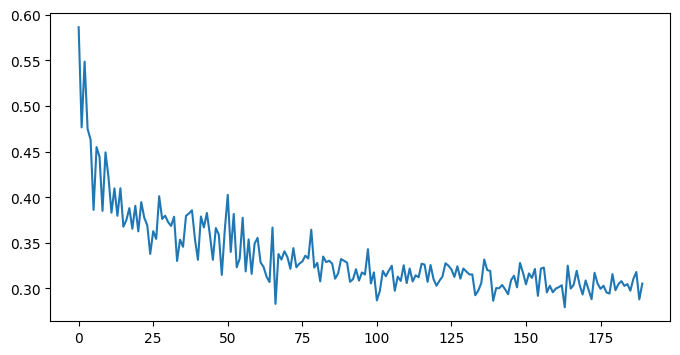

validation error for model_batch 1910: 0.30172064900398254
validation error for model_batch 1920: 0.2999180555343628
validation error for model_batch 1930: 0.2872380316257477
validation error for model_batch 1940: 0.2738505005836487
validation error for model_batch 1950: 0.30215853452682495
validation error for model_batch 1960: 0.2954026460647583
validation error for model_batch 1970: 0.3008083701133728
validation error for model_batch 1980: 0.29711103439331055
validation error for model_batch 1990: 0.29304444789886475
validation error for model_batch 2000: 0.29293256998062134


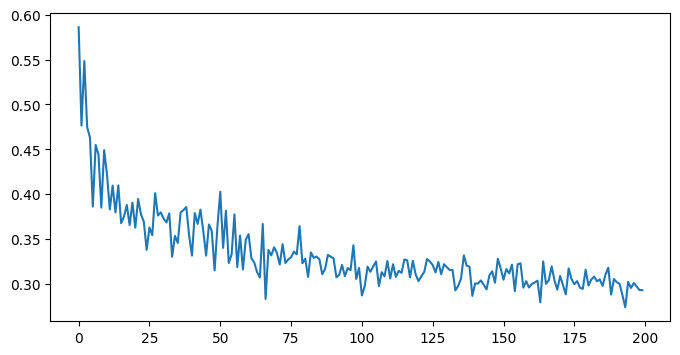

validation error for model_batch 2010: 0.29439589381217957
validation error for model_batch 2020: 0.30561110377311707
validation error for model_batch 2030: 0.27915820479393005
validation error for model_batch 2040: 0.2892833948135376
validation error for model_batch 2050: 0.28876402974128723
validation error for model_batch 2060: 0.309314489364624
validation error for model_batch 2070: 0.2886788845062256
validation error for model_batch 2080: 0.3047513961791992
validation error for model_batch 2090: 0.2888258397579193
validation error for model_batch 2100: 0.28054141998291016


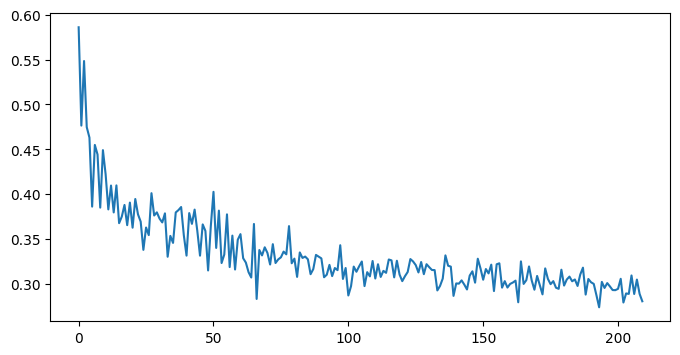

validation error for model_batch 2110: 0.29565590620040894
validation error for model_batch 2120: 0.2994900345802307
validation error for model_batch 2130: 0.2839771509170532
validation error for model_batch 2140: 0.29843270778656006
validation error for model_batch 2150: 0.29206979274749756
validation error for model_batch 2160: 0.277728796005249
validation error for model_batch 2170: 0.28366613388061523
validation error for model_batch 2180: 0.3011336326599121
validation error for model_batch 2190: 0.288693368434906
validation error for model_batch 2200: 0.3032621145248413


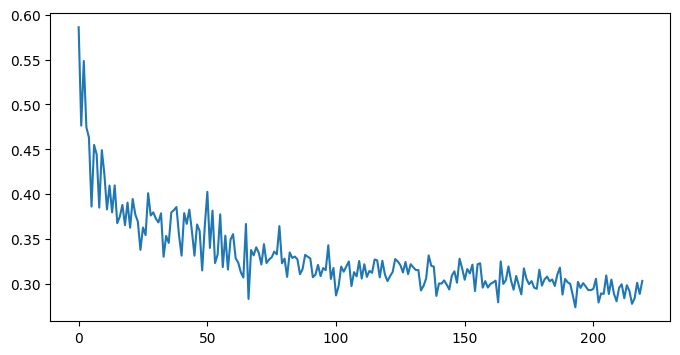

validation error for model_batch 2210: 0.2917604148387909
validation error for model_batch 2220: 0.2896532714366913
validation error for model_batch 2230: 0.2905835211277008
validation error for model_batch 2240: 0.31196343898773193
validation error for model_batch 2250: 0.29360753297805786
validation error for model_batch 2260: 0.2825259268283844
validation error for model_batch 2270: 0.2983901798725128
validation error for model_batch 2280: 0.3029993176460266
validation error for model_batch 2290: 0.28181907534599304
validation error for model_batch 2300: 0.28581932187080383


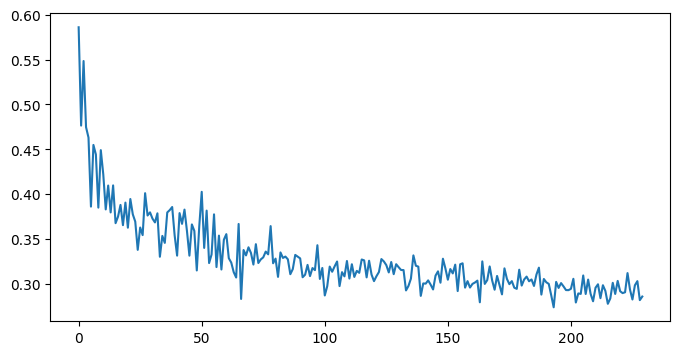

validation error for model_batch 2310: 0.2844763398170471
validation error for model_batch 2320: 0.2874167859554291
validation error for model_batch 2330: 0.3112703263759613
validation error for model_batch 2340: 0.2989141643047333
validation error for model_batch 2350: 0.29925721883773804
validation error for model_batch 2360: 0.295082151889801
validation error for model_batch 2370: 0.2914036214351654
validation error for model_batch 2380: 0.28863972425460815
validation error for model_batch 2390: 0.2720070779323578
validation error for model_batch 2400: 0.2742748260498047


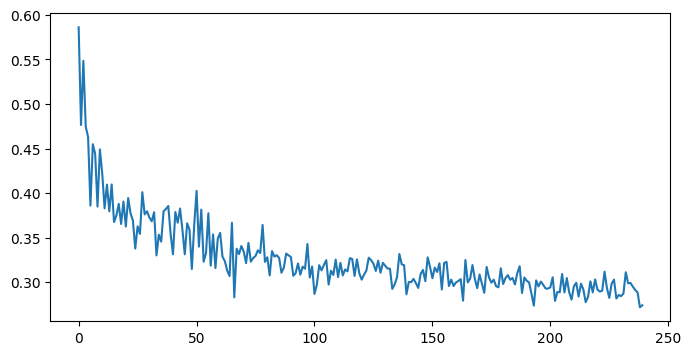

validation error for model_batch 2410: 0.30531349778175354
validation error for model_batch 2420: 0.306448757648468
validation error for model_batch 2430: 0.2880365550518036
validation error for model_batch 2440: 0.3070981204509735
validation error for model_batch 2450: 0.2987297475337982
validation error for model_batch 2460: 0.29967358708381653
validation error for model_batch 2470: 0.2922525703907013
validation error for model_batch 2480: 0.29784151911735535
validation error for model_batch 2490: 0.3022269308567047
validation error for model_batch 2500: 0.28254517912864685


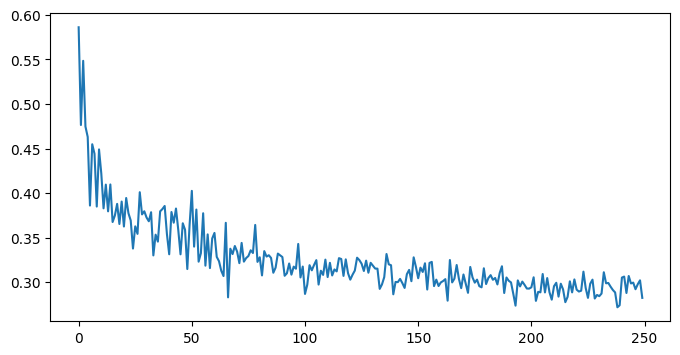

validation error for model_batch 2510: 0.2932492792606354
validation error for model_batch 2520: 0.3331841826438904
validation error for model_batch 2530: 0.2965504229068756
validation error for model_batch 2540: 0.3140062987804413
validation error for model_batch 2550: 0.29658403992652893
validation error for model_batch 2560: 0.30773741006851196
validation error for model_batch 2570: 0.29038089513778687
validation error for model_batch 2580: 0.2930993139743805
validation error for model_batch 2590: 0.3073637783527374
validation error for model_batch 2600: 0.2900656759738922


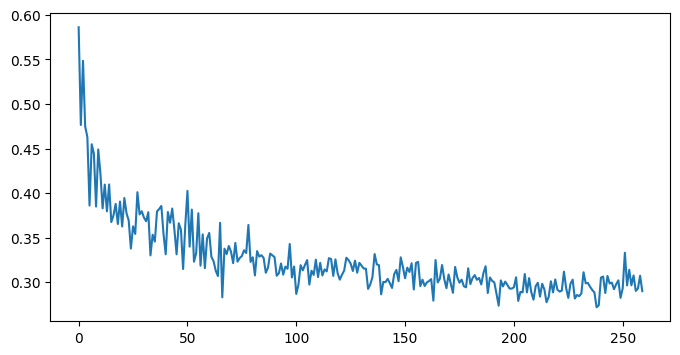

validation error for model_batch 2610: 0.2919275462627411
validation error for model_batch 2620: 0.2945404648780823
validation error for model_batch 2630: 0.3140576183795929
validation error for model_batch 2640: 0.3003388047218323
validation error for model_batch 2650: 0.29090356826782227
validation error for model_batch 2660: 0.29848024249076843
validation error for model_batch 2670: 0.30112457275390625
validation error for model_batch 2680: 0.30573129653930664
validation error for model_batch 2690: 0.2909165322780609
validation error for model_batch 2700: 0.2927958369255066


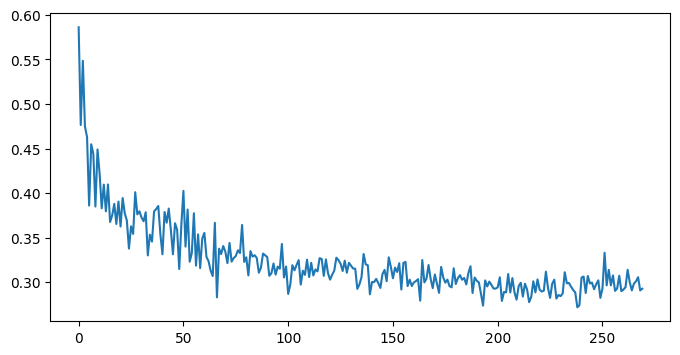

validation error for model_batch 2710: 0.29675543308258057
validation error for model_batch 2720: 0.30005067586898804
validation error for model_batch 2730: 0.3146335482597351
validation error for model_batch 2740: 0.2973867952823639
validation error for model_batch 2750: 0.30186963081359863
validation error for model_batch 2760: 0.3090948462486267
validation error for model_batch 2770: 0.2996918559074402
validation error for model_batch 2780: 0.30778026580810547
validation error for model_batch 2790: 0.3137422502040863
validation error for model_batch 2800: 0.3015475273132324


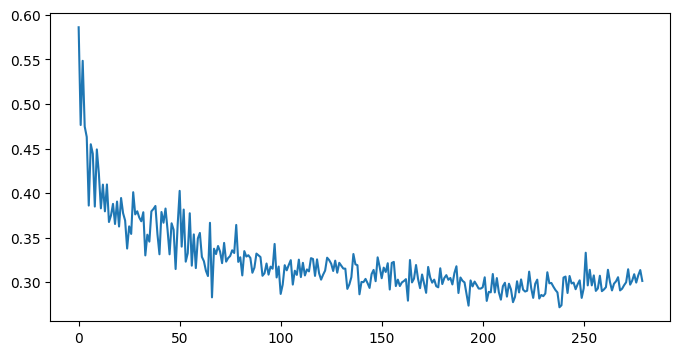

validation error for model_batch 2810: 0.28273046016693115
validation error for model_batch 2820: 0.2922428548336029
validation error for model_batch 2830: 0.3031125068664551
validation error for model_batch 2840: 0.2948708236217499
validation error for model_batch 2850: 0.30533817410469055
validation error for model_batch 2860: 0.30355966091156006
validation error for model_batch 2870: 0.31922194361686707
validation error for model_batch 2880: 0.2933310568332672
validation error for model_batch 2890: 0.29482051730155945
validation error for model_batch 2900: 0.291950523853302


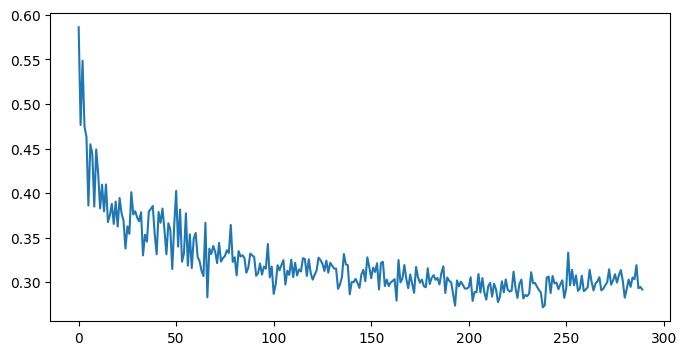

validation error for model_batch 2910: 0.30450722575187683
validation error for model_batch 2920: 0.3013571798801422
validation error for model_batch 2930: 0.28479230403900146
validation error for model_batch 2940: 0.29637011885643005
validation error for model_batch 2950: 0.28429728746414185
validation error for model_batch 2960: 0.30340173840522766
validation error for model_batch 2970: 0.2877841591835022
validation error for model_batch 2980: 0.30261197686195374
validation error for model_batch 2990: 0.313703715801239
validation error for model_batch 3000: 0.29813599586486816


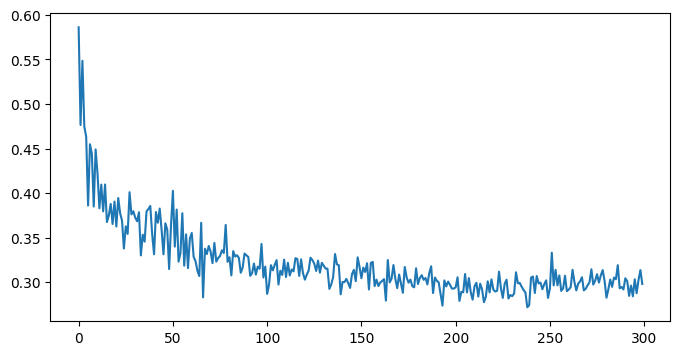

validation error for model_batch 3010: 0.3039989471435547
validation error for model_batch 3020: 0.28853774070739746
validation error for model_batch 3030: 0.2923620641231537
validation error for model_batch 3040: 0.30031120777130127
validation error for model_batch 3050: 0.3144334852695465
validation error for model_batch 3060: 0.3059915602207184


KeyboardInterrupt: 

In [7]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v27_2')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v27()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v27_2/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    torch.save(validation_error_list, 'validation_errors_v27_2')

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()

In [12]:
torch.save(validation_error_list, 'validation_errors_v27_2')